# A One-liner Classifier (Models with Chosen Parameters)


The classifier function _(train_test_plot)_ runs the following steps:

1. Takes the classifier models as input
2. Divides the dataset to the target (y) and the features (X) matrices
3. Scales X
4. Splits the data to train and test set
5. Selects a classification model from the list in step 1.
6. Trains the model
7. Tests the model
8. Gets several scores to evaluate the model, using the test and predicted data
9. Plots the confusion matrix
10. Plots the feature importance (if that feature is available for the selected algorithm)
11. Selects another classification model and goes to step 6, until the list of classifiers is exhausted
12. Compares the accuracies of all the models tried out in the form of a bar plot

Therefore, we just have to call the function to perform all the steps described above.

## The Complete Source Code

In [19]:
#------------------------------------------------------------------------------------------------------------------
# train_test_plot
#
# MIT License 
# Dr Debdarsan Niyogi (debdarsan.niyogi@gmail.com)
#------------------------------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from IPython.display import HTML

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

import warnings
warnings.filterwarnings("ignore")

# Initialize an empty list of classification algorithms
algorithm_list = []

# Initialize an empty list for the accuracy of each algorithm
accuracy_list = []

def _plot_confusion_matrix(conf_mat, classes, normalize = False, title = 'Confusion Matrix',
                          cmap = plt.cm.Greens, size = 5):
    """
    Plots confusion matrix for binary or multi-class classification
       
    Parameters:
    ----------
        conf_mat: confusion matrix, given test and predicted values of the target (dependent) variable
        classes: comma separated unique class names of the target variable to be predicted
        normalize: boolean flag indicating if normalization is to be applied
        title: title of the confusion matrix plot
        ax: axes object(s) of the plot
        cmap: color map
        size: integer controlling size of the plot and the labels proportionally
    
    Returns:
    -------
        None
    
    """
    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.set_title(title, fontsize = size + 10)
    plt.tick_params(axis = 'x', labelsize = size + 8)
    plt.tick_params(axis = 'y', labelsize = size + 8)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, size = size + 8)
    plt.yticks(tick_marks, classes, size = size + 8)
    plt.sca(ax)
    
    fmt = '.2f' if normalize else 'd'
    thresh = conf_mat.max() / 2.
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        ax.text(j, i, format(conf_mat[i, j], fmt),
                horizontalalignment = "center",
                color= "white" if conf_mat[i, j] > thresh else "black", size = size + 8)

    ax.set_ylabel('True Label', fontsize = size + 8)
    ax.set_xlabel('Predicted Label', fontsize = size + 8)
    ax.imshow(conf_mat, interpolation = 'nearest', cmap = cmap)
    
    plt.show()
    
    return

    
def _compare_algos(algorithm_list, accuracy_list, size = 5):
    
    """
    Plots algorithm names vs the testing accuracy figures
    
    Parameters:
    algorithm_list: list of names of the algorithms
    accuracy_list: list of accuracy values
    size: integer controlling the size of the plot and the labels proportionally
    
    """

    # Combine the list of algorithms and list of accuracy scores into a dataframe
    # and sort the values based on accuracy score
    df_accuracy = pd.DataFrame(list(zip(algorithm_list, accuracy_list)), 
                  columns = ['Algorithm', 'Accuracy Score']).sort_values(by = ['Accuracy Score'], ascending = True)
    
    # Plot
    ax = df_accuracy.plot.barh('Algorithm', 'Accuracy Score', align = 'center', legend = False, color = 'g')

    # Add the data labels
    for i in ax.patches:
        ax.text(i.get_width() + 0.02, i.get_y() + 0.2, str(round(i.get_width(), 2)), fontsize = 10)

    # Set the limit
    plt.xlim(0, 1.1)
    
    # Set the lables
    plt.xlabel('Test Accuracy Score')
    
    # Set ticks
    # Generate a list of ticks for y-axis
    y_ticks = np.arange(len(algorithm_list))
    plt.yticks(y_ticks, df_accuracy['Algorithm'], rotation = 0)
    
    # Set title
    plt.title('Algorithm performance')
    
    # Turn of top and right frames
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return

def train_test_plot(df, target, size, models):
    
    """
    Performs the following operations:
    ---------------------------------
    
    1. Splits the dataframe into target (dependent variable) and predictors (independent variable)
    2. Scales the values of independent variables (all input values must be numeric)
    3. Splits the dataset into train and test sets
    4. Loops through the list of classification algorithms to
       a) Train
       b) Test
       c) Evaluate and report performance
       d) Plot Confusion Matrix
       e) Plot feature importance (if it is available for this particular algorithm)
    5. Shows comparative plot of accuracies for all the algorithms
       
    Parameters:
    ----------
       df (pandas dataframe): the whole dataset containing observations for both target and predictor variables
       target (string): column name of the target variable in df, e.g. 'Species'
       size (int): size of the plots, typical values are 5, 10, 15
       models: holding objects of classification models
       
    Returns:
    -------
        None
       
    Example:
    -------
       train_test_plot(iris_df, 'Species', 5, models)
       where,
            iris_df: input dataframe,  e.g. iris_df = pd.read_csv('Iris.csv')
            'Species': name of the target column in iris_df
            5: size of the plots generated
            models: list of model objects
            
    """ 
    
    # set X and y
    y = df[target]
    X = df.drop(target, axis=1)

    # scale X
    X = StandardScaler().fit(X).transform(X)

    # Split the data set into training and testing data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Target class names
    classes = np.unique(df[target])
    
    algorithm_list = []
    accuracy_list = []
    display(models)
    for i in range(len(models)):
        
        model = models[i]
        algorithm_list.append(models.index[i])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        disp_line = '<h1>' + models.index[i] + '</h1>'
        display(HTML(disp_line))
        disp_line = '<h2>Scores:</h2>'
        display(HTML(disp_line))
        
        acc = accuracy_score(y_test, y_pred)
        precision, recall, fscore, support = score(y_test, y_pred)
        
        score_df = pd.DataFrame(list(zip(precision, recall, fscore, support)), 
                   columns =['precision', 'recall', 'fscore', 'support'])
        score_df = pd.concat([pd.DataFrame(classes), score_df], axis = 1)        
        score_df.columns =['Target Class', 'precision', 'recall', 'fscore', 'support'] 
        
        
        display(HTML(score_df.to_html(index=False)))

        accuracy_list.append(acc)
        cm_model = confusion_matrix(y_test, y_pred)
        
        
        _plot_confusion_matrix(cm_model, classes=classes, title=models.index[i]+'\nTest Accuracy: {:.2f}'.format(acc))
       
        
        if hasattr(model, 'feature_importances_'):
        
            fig, ax = plt.subplots(figsize=(size,size))
            plt.tick_params(axis='x', labelsize=size+5)
            plt.tick_params(axis='y', labelsize=size+5)
            plt.xticks(size=size+5)
            plt.yticks(size=size+5)
            plt.xlabel('')
            ax.set_title('Feature Importance (using '+ models.index[i] + ')', fontsize=size+10)
            
            importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=df.drop(target,axis=1).columns)
            importances.iloc[:,0] = model.feature_importances_
            importances.sort_values(by='importance', inplace=True, ascending=False)
            importancestop = importances.head(10)
            
            sns.barplot(x='importance', y=importancestop.index, data=importancestop)
            
            plt.show()
    
    _compare_algos(algorithm_list, accuracy_list)
    
    return

## Load Data

In [20]:
import pandas as pd

df = pd.read_csv('glass.csv')
df.head()

,Refractive Index,Sodium,Magnesium,Aluminium,Silicone,Potassium,Calcium,Barium,Iron,Glass Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Call Classifier

Logistic Regression    LogisticRegression(max_iter=10000, random_stat...
K-Neighbors               KNeighborsClassifier(n_jobs=-1, n_neighbors=7)
Support Vector             SVC(class_weight='balanced', random_state=42)
Decision Tree          DecisionTreeClassifier(criterion='entropy', ra...
Random Forest          RandomForestClassifier(n_jobs=-1, random_state...
XGBoost                XGBClassifier(base_score=None, booster=None, c...
dtype: object

Target Class,precision,recall,fscore,support
1,0.714286,0.714286,0.714286,14
2,0.687500,0.733333,0.709677,15
3,0.000000,0.000000,0.000000,3
5,1.000000,1.000000,1.000000,3
6,0.666667,1.000000,0.800000,2
7,1.000000,1.000000,1.000000,6


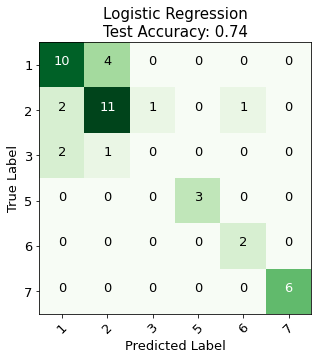

Target Class,precision,recall,fscore,support
1,0.625000,0.714286,0.666667,14
2,0.611111,0.733333,0.666667,15
3,0.000000,0.000000,0.000000,3
5,0.666667,0.666667,0.666667,3
6,1.000000,0.500000,0.666667,2
7,1.000000,0.833333,0.909091,6


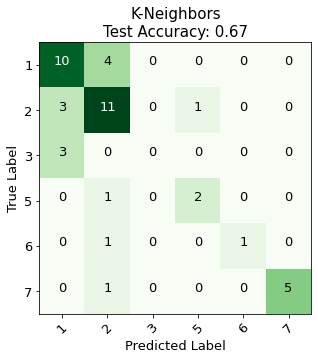

Target Class,precision,recall,fscore,support
1,0.750000,0.642857,0.692308,14
2,0.769231,0.666667,0.714286,15
3,0.166667,0.333333,0.222222,3
5,1.000000,1.000000,1.000000,3
6,0.500000,0.500000,0.500000,2
7,0.857143,1.000000,0.923077,6


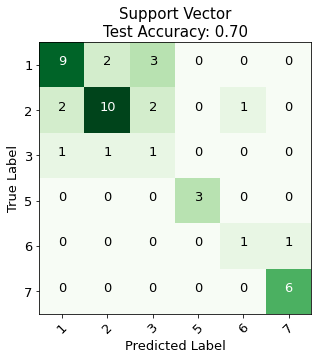

Target Class,precision,recall,fscore,support
1,0.875000,0.500000,0.636364,14
2,0.769231,0.666667,0.714286,15
3,0.375000,1.000000,0.545455,3
5,1.000000,0.666667,0.800000,3
6,0.666667,1.000000,0.800000,2
7,0.666667,1.000000,0.800000,6


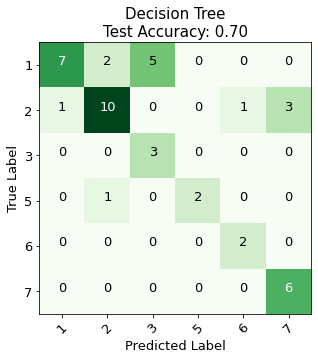

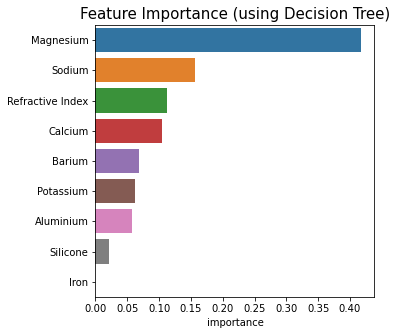

Target Class,precision,recall,fscore,support
1,0.750000,0.857143,0.800000,14
2,0.846154,0.733333,0.785714,15
3,0.666667,0.666667,0.666667,3
5,1.000000,0.666667,0.800000,3
6,0.666667,1.000000,0.800000,2
7,1.000000,1.000000,1.000000,6


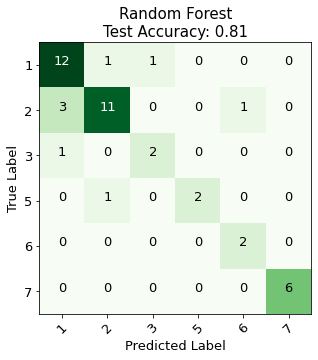

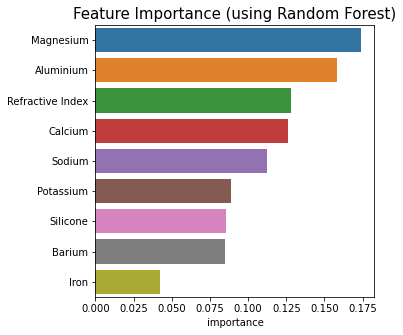

Target Class,precision,recall,fscore,support
1,0.800000,0.857143,0.827586,14
2,0.833333,0.666667,0.740741,15
3,0.666667,0.666667,0.666667,3
5,0.750000,1.000000,0.857143,3
6,0.666667,1.000000,0.800000,2
7,0.833333,0.833333,0.833333,6


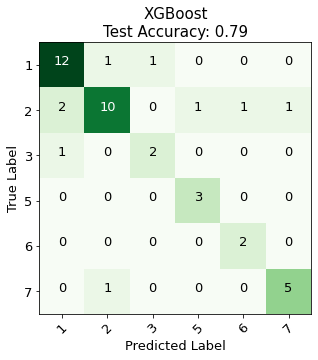

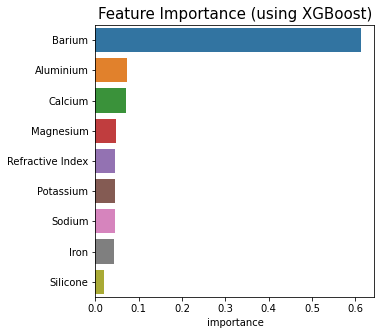

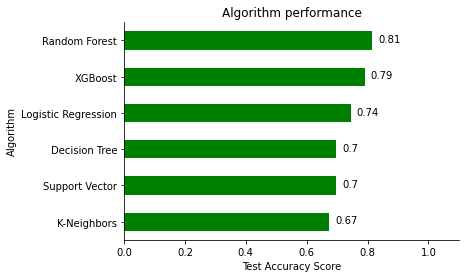

In [21]:
# Import LogisticRegression, KNeighborsClassifier, SVM, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize empty Classifier Models
clf_models = []

model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=10000)
clf_models.append(model)

model = KNeighborsClassifier(n_neighbors=7, leaf_size=30, n_jobs=-1)
clf_models.append(model)

model = svm.SVC(random_state=42, class_weight='balanced')
clf_models.append(model)

model = DecisionTreeClassifier(random_state=42, criterion='entropy')
clf_models.append(model)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf_models.append(model)

model = XGBClassifier()
clf_models.append(model)

selected_models = pd.Series(clf_models,
            index=['Logistic Regression', 'K-Neighbors', 'Support Vector', 'Decision Tree', 
                   'Random Forest', 'XGBoost'])
# Target variable
target = 'Glass Class'

# Call classifier
train_test_plot(df=df, target=target, size=5, models=selected_models)